On import les packages nécessaires

In [2]:
from apyori import apriori
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt


On va chercher les données mises en forme

In [3]:
merged_data = pd.read_csv("../result/the_result_file.csv", index_col=0)
merged_data.dropna(inplace=True)

y = merged_data.grav
merged_data_sans_grav = merged_data.drop(['grav'],axis = 1)

Histogrammes : 

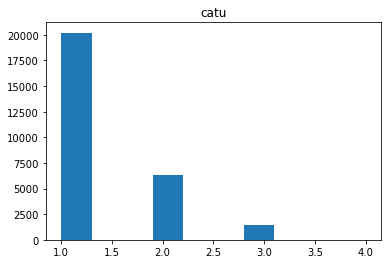

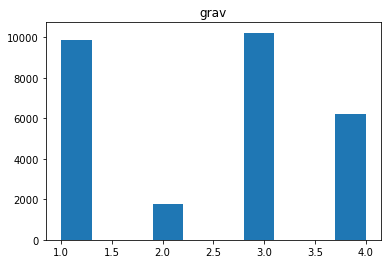

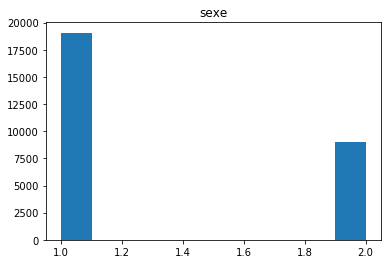

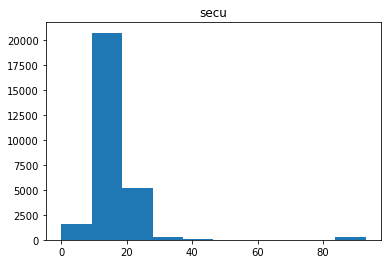

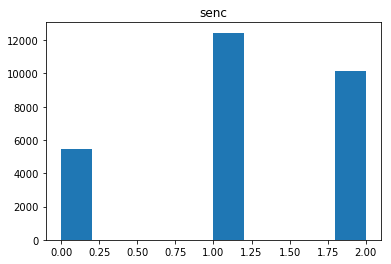

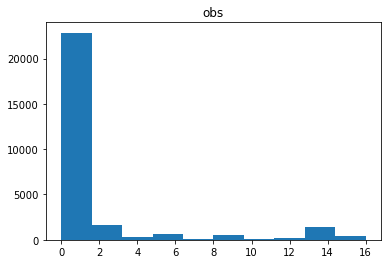

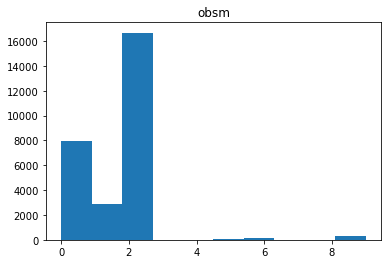

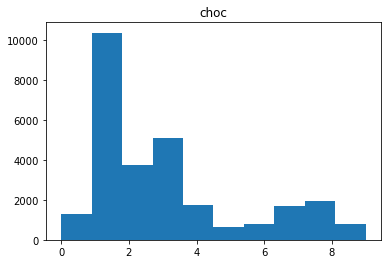

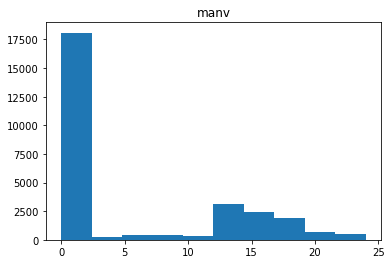

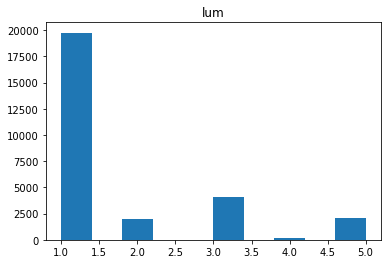

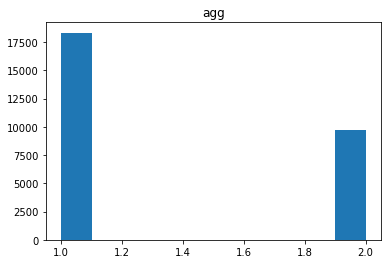

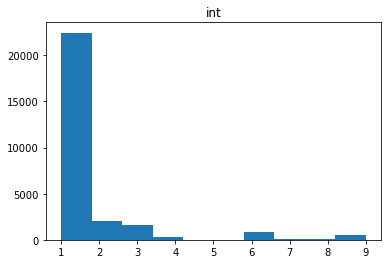

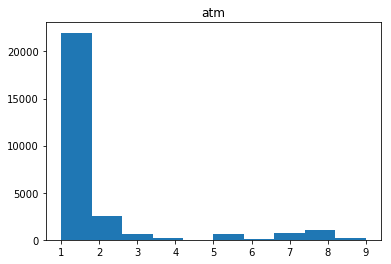

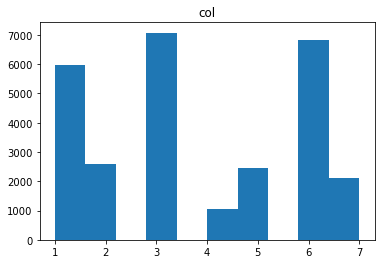

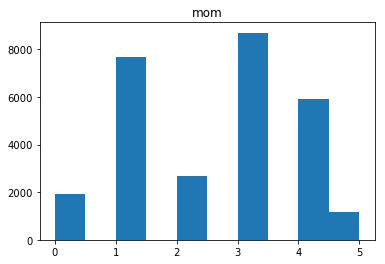

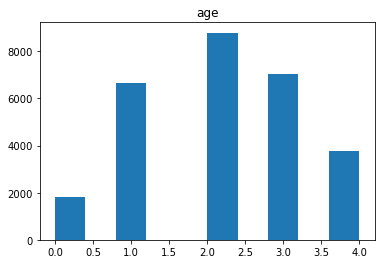

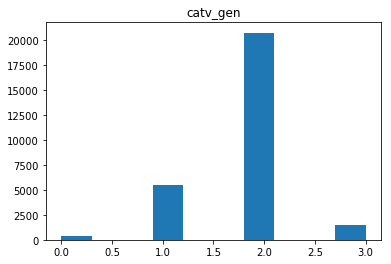

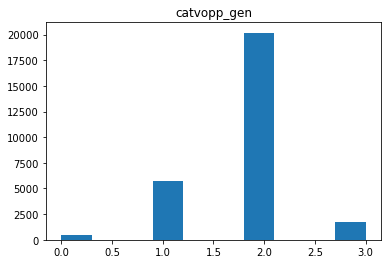

In [4]:
colnames = (merged_data.columns)


def histogrammes(data=merged_data, colonnes=colnames):
    for col in colonnes:

        plt.title(str(col))
        plt.hist(merged_data[col])
        plt.show()
        plt.close()

histogrammes()

Une fonction pour binariser nos données

In [5]:
def encoding(data):
    colnames = data.columns
    
    result = pd.DataFrame(index=data.index)
    
    for colname in colnames:
        dum = pd.get_dummies(data[colname], prefix=colname)
        result = pd.merge(result, dum, left_index=True, right_index=True)
    return result


encoded = encoding(merged_data)

In [6]:
def into_transactions(data):
    
    transactions = []
    for indexe in data.index:
        event = []
        for colonne in data.columns:
            if data[colonne][indexe] == 1:
                event.append(colonne)
        transactions.append(event)
    return transactions

In [7]:
trans = into_transactions(encoded)

In [8]:
pd.DataFrame(trans)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,catu_1.0,grav_1.0,sexe_2.0,secu_11.0,senc_0.0,obs_0.0,obsm_0.0,choc_1.0,manv_1.0,lum_1.0,agg_2.0,int_1.0,atm_8.0,col_3.0,mom_3.0,age_2.0,catv_gen_2.0,catvopp_gen_1.0
1,catu_1.0,grav_3.0,sexe_1.0,secu_11.0,senc_0.0,obs_6.0,obsm_0.0,choc_1.0,manv_1.0,lum_1.0,agg_2.0,int_6.0,atm_1.0,col_6.0,mom_4.0,age_3.0,catv_gen_2.0,catvopp_gen_2.0
2,catu_2.0,grav_3.0,sexe_1.0,secu_11.0,senc_0.0,obs_6.0,obsm_0.0,choc_1.0,manv_1.0,lum_1.0,agg_2.0,int_6.0,atm_1.0,col_6.0,mom_4.0,age_1.0,catv_gen_2.0,catvopp_gen_2.0
3,catu_2.0,grav_3.0,sexe_2.0,secu_11.0,senc_0.0,obs_6.0,obsm_0.0,choc_1.0,manv_1.0,lum_1.0,agg_2.0,int_6.0,atm_1.0,col_6.0,mom_4.0,age_3.0,catv_gen_2.0,catvopp_gen_2.0
4,catu_1.0,grav_1.0,sexe_1.0,secu_11.0,senc_0.0,obs_0.0,obsm_1.0,choc_6.0,manv_1.0,lum_1.0,agg_1.0,int_1.0,atm_1.0,col_6.0,mom_4.0,age_1.0,catv_gen_2.0,catvopp_gen_2.0
5,catu_3.0,grav_3.0,sexe_1.0,secu_0.0,senc_0.0,obs_0.0,obsm_1.0,choc_6.0,manv_1.0,lum_1.0,agg_1.0,int_1.0,atm_1.0,col_6.0,mom_4.0,age_3.0,catv_gen_2.0,catvopp_gen_2.0
6,catu_1.0,grav_3.0,sexe_1.0,secu_23.0,senc_0.0,obs_0.0,obsm_0.0,choc_1.0,manv_1.0,lum_2.0,agg_2.0,int_1.0,atm_7.0,col_3.0,mom_4.0,age_1.0,catv_gen_1.0,catvopp_gen_2.0
7,catu_1.0,grav_3.0,sexe_2.0,secu_21.0,senc_0.0,obs_0.0,obsm_2.0,choc_1.0,manv_15.0,lum_1.0,agg_2.0,int_3.0,atm_1.0,col_3.0,mom_1.0,age_3.0,catv_gen_1.0,catvopp_gen_2.0
8,catu_2.0,grav_3.0,sexe_2.0,secu_21.0,senc_0.0,obs_0.0,obsm_2.0,choc_1.0,manv_15.0,lum_1.0,agg_2.0,int_3.0,atm_1.0,col_3.0,mom_1.0,age_0.0,catv_gen_1.0,catvopp_gen_2.0
9,catu_1.0,grav_1.0,sexe_1.0,secu_11.0,senc_0.0,obs_0.0,obsm_2.0,choc_3.0,manv_1.0,lum_1.0,agg_2.0,int_3.0,atm_1.0,col_3.0,mom_1.0,age_3.0,catv_gen_2.0,catvopp_gen_1.0


In [9]:
def mise_en_place_apriori(transactions, min_sup=0.40, min_conf=0.90, min_length=2):
    
    results_apriori = list(apriori(transactions, min_support = min_sup))#, min_confidence = min_conf))

    tableau_apriori = []

    for x in range(0,len(results_apriori)):
        event = [list(results_apriori[x].items), results_apriori[x].support, results_apriori[x].ordered_statistics[0].confidence]
        if len(event[0]) >= min_length:
            tableau_apriori.append(event)

    tableau_apriori = pd.DataFrame(tableau_apriori, columns=['itemsets','support','confiance'])
    tableau_apriori.drop('confiance', axis=1, inplace=True)
    os.system('say "fini"')
    return tableau_apriori


In [10]:
from apyori import apriori

ess = mise_en_place_apriori(trans)



In [11]:
def apriori_total(data, colonnes=None, criteres=None, min_sup=0.4, colonnes_cibles=None):
    dat = data
    
    if not colonnes is None:
        for j in range(len(colonnes)):
            dat = pd.DataFrame(dat[dat[colonnes[j]] == criteres[j]])
            dat = dat.drop(colonnes[j], axis=1)
            
    if not colonnes_cibles is None:
        dat = pd.DataFrame(dat[colonnes_cibles])
    
    enco = encoding(dat)
    
    tr = into_transactions(enco)
    
    result = mise_en_place_apriori(tr, min_sup=min_sup)
    
    return result

In [12]:
apriori_sur_tout = apriori_total(merged_data)
apriori_sur_morts = apriori_total(merged_data, colonnes = ['grav'], criteres=[2])
apriori_sur_indemmes = apriori_total(merged_data, colonnes = ['grav'], criteres=[1])

In [13]:
apriori_sur_tout

,itemsets,support
0,"[agg_1.0, atm_1.0]",0.495723
1,"[agg_1.0, catu_1.0]",0.464754
2,"[catv_gen_2.0, agg_1.0]",0.501853
3,"[agg_1.0, catvopp_gen_2.0]",0.483215
4,"[agg_1.0, int_1.0]",0.551746
5,"[agg_1.0, lum_1.0]",0.455666
6,"[obs_0.0, agg_1.0]",0.496294
7,"[secu_11.0, agg_1.0]",0.470171
8,"[sexe_1.0, agg_1.0]",0.442587
9,"[catu_1.0, atm_1.0]",0.569458


In [14]:
def intersection_2_listes(L1, L2):
    """List[Int] * List[Int] -> List[Int]
    Retourne l'intersection des deux listes L1 et L2."""
 
    result = []
 
    for n in L1:
        for x in L2:
            if n == x and n not in result:
                result.append(n)
    result.sort()
 
    return result

In [15]:
association_tout = list(apriori_sur_tout.itemsets)
association_indemmes = list(apriori_sur_indemmes.itemsets)
association_morts = list(apriori_sur_morts.itemsets)

tout_inter_morts = intersection_2_listes(association_tout, association_morts)
tout_inter_indemmes = intersection_2_listes(association_tout,association_indemmes)
indemmes_inter_morts = intersection_2_listes(association_indemmes,association_morts)

In [16]:
apriori_ado_morts = apriori_total(merged_data, colonnes = ['secu','age', 'agg','catv_gen'], criteres=[22,1,1,1], min_sup=.5)

In [17]:
def transactions_total(data, colonnes=None, criteres=None, min_sup=0.4, colonnes_cibles=None):
    dat = data
    
    if not colonnes is None:
        for j in range(len(colonnes)):
            ess = dat
            dat = pd.DataFrame(dat[dat[colonnes[j]] == criteres[j]])
            dat = dat.drop(colonnes[j], axis=1)
            
    if not colonnes_cibles is None:
        dat = pd.DataFrame(dat[colonnes_cibles])
    
    enco = encoding(dat)
    
    tr = into_transactions(enco)

    
    return tr

In [18]:
from mlxtend.frequent_patterns import apriori as apr
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import OnehotTransactions

trans = transactions_total(merged_data_sans_grav)

oht = OnehotTransactions()
oht_ary = oht.fit(trans).transform(trans)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
frequent_itemsets = apr(df, min_support=0.6, use_colnames=True)
AR = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

In [47]:
def AssociationRules(data, colonnes=None, criteres=None, min_sup=0.4, colonnes_cibles=None, colonnes_inutiles=None):
    dat = data
    
    if not colonnes is None:
        for j in range(len(colonnes)):
            ess = dat
            dat = pd.DataFrame(dat[dat[colonnes[j]] == criteres[j]])
            dat = dat.drop(colonnes[j], axis=1)
            
    if not colonnes_cibles is None:
        dat = pd.DataFrame(dat[colonnes_cibles])
        
    if not colonnes_inutiles is None:
        for col in colonnes_inutiles:
            dat = dat.drop(col, axis=1)
    
    enco = encoding(dat)
    
    trans = into_transactions(enco)
    
    from mlxtend.frequent_patterns import apriori as apr
    from mlxtend.frequent_patterns import association_rules
    from mlxtend.preprocessing import OnehotTransactions

    oht = OnehotTransactions()
    oht_ary = oht.fit(trans).transform(trans)
    df = pd.DataFrame(oht_ary, columns=oht.columns_)
    frequent_itemsets = apr(df, min_support=0.6, use_colnames=True)
    AR = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_sup)
    
    
    os.system('say "règle d association"')
    return AR


#AR_sad = AssociationRules(merged_data, colonnes = ['secu','age', 'agg','catv_gen','int','obs'], criteres=[22,1,1,1,1,0], min_sup=.5)

In [21]:
apriori_ado_morts = apriori_total(merged_data, colonnes = ['catv_gen','age', 'grav'], criteres=[1,2,2], min_sup=.5)

In [22]:
apriori_morts = apriori_total(merged_data, colonnes = ['catv_gen', 'grav'], criteres=[1,2], min_sup=.5)

In [23]:
apriori_ado_morts

,itemsets,support
0,"[agg_1.0, atm_1.0]",0.632353
1,"[agg_1.0, catu_1.0]",0.713235
2,"[agg_1.0, choc_1.0]",0.500000
3,"[agg_1.0, int_1.0]",0.676471
4,"[agg_1.0, lum_1.0]",0.514706
5,"[obs_0.0, agg_1.0]",0.514706
6,"[secu_21.0, agg_1.0]",0.632353
7,"[sexe_1.0, agg_1.0]",0.705882
8,"[catu_1.0, atm_1.0]",0.852941
9,"[choc_1.0, atm_1.0]",0.588235


In [24]:
apriori_morts

,itemsets,support
0,"[agg_1.0, atm_1.0]",0.642384
1,"[agg_1.0, catu_1.0]",0.686534
2,"[agg_1.0, int_1.0]",0.635762
3,"[agg_1.0, lum_1.0]",0.540839
4,"[obs_0.0, agg_1.0]",0.525386
5,"[secu_21.0, agg_1.0]",0.633554
6,"[sexe_1.0, agg_1.0]",0.666667
7,"[catu_1.0, atm_1.0]",0.836645
8,"[choc_1.0, atm_1.0]",0.523179
9,"[atm_1.0, int_1.0]",0.752759


In [25]:
population = {'colonnes': ['catv_gen', 'catvopp_gen','col'], 'criteres': [2,2, 1]}

In [26]:
sous_pop = {'colonnes': 'age', 'critere': 4}

In [27]:
def comparaison(data=merged_data, pop=population, spop=sous_pop, min_sup=0.5):
    col1 = pop['colonnes']
    col2 = col1 + [sous_pop['colonnes']]
    crit1 = pop['criteres']
    crit2 = crit1 + [sous_pop['critere']]
    
    ap1 = apriori_total(data=data, colonnes=col1, criteres=crit1, min_sup=min_sup)
    ap2 = apriori_total(data=data, colonnes=col2, criteres=crit2, min_sup=min_sup)
    
    result = {'population': ap1, 'sous_population': ap2}
    return result

In [28]:
def analyse_comparaison(data=merged_data, pop=population, spop=sous_pop, min_sup=0.5, longueur_info=None, pct_influence=None):
    
    comp = comparaison(data=data, pop=pop, spop=spop, min_sup=min_sup)

    e1 = pd.DataFrame(comp['population'])
    e2 = pd.DataFrame(comp['sous_population'])

    result = []
    
    for x in e1.index:
        for y in e2.index:
            if e1['itemsets'][x] == e2['itemsets'][y]:
                event = [e1['itemsets'][x], e1['support'][x], e2['support'][y]]
                result.append(event)
    result = pd.DataFrame(result, columns=['itemsets', 'support_pop', 'support_sous_pop'])
    
    if not longueur_info is None:
        criterion = result['itemsets'].map(lambda x: len(x) >= longueur_info)
        result =result[criterion]
    if not pct_influence is None:
        result = result[result['support_pop']  < pct_influence *  result['support_sous_pop']]
    
    
    result['ratio'] = result['support_pop'] / result['support_sous_pop']
    
    return result



df_resultat = analyse_comparaison(longueur_info=None, min_sup=0.2, pct_influence=None)

In [29]:
df_resultat

,itemsets,support_pop,support_sous_pop,ratio
0,"[agg_1.0, atm_1.0]",0.569926,0.584730,0.974683
1,"[agg_1.0, catu_1.0]",0.567652,0.521415,1.088676
2,"[agg_1.0, catu_2.0]",0.256111,0.294227,0.870455
3,"[agg_1.0, choc_1.0]",0.394258,0.402235,0.980169
4,"[agg_1.0, choc_3.0]",0.288516,0.292365,0.986836
5,"[agg_1.0, grav_3.0]",0.377771,0.411546,0.917933
6,"[agg_1.0, int_1.0]",0.758670,0.715084,1.060952
7,"[agg_1.0, lum_1.0]",0.604889,0.687151,0.880286
8,"[agg_1.0, manv_1.0]",0.455657,0.487896,0.933922
9,"[mom_3.0, agg_1.0]",0.261512,0.342644,0.763218


In [30]:
an = df_resultat[df_resultat['ratio'] > 1.25]

In [31]:
an

,itemsets,support_pop,support_sous_pop,ratio
74,"[obs_0.0, grav_4.0]",0.271177,0.204842,1.323836
75,"[secu_11.0, grav_4.0]",0.258101,0.202980,1.271563
514,"[sexe_1.0, agg_1.0, atm_1.0, int_1.0]",0.320068,0.255121,1.254574
1035,"[sexe_1.0, atm_1.0, agg_1.0, obsm_2.0, int_1.0]",0.287663,0.227188,1.266191
1408,"[sexe_1.0, atm_1.0, agg_1.0, obs_0.0, obsm_2.0...",0.279704,0.223464,1.251677


In [50]:
AR_sad = AssociationRules(merged_data, 
                          colonnes = ['age', 'mom', 'catv_gen', 'catvopp_gen', 'atm', 'int', 'agg', 'obsm'], 
                          criteres=[1, 0, 2, 2, 2, 1, 1, 0], 
                          min_sup=.05)


#AR_sad = AR_sad[AR_sad['confidence']>0.8]

In [51]:
AR_sad

,antecedants,consequents,support,confidence,lift
0,(lum_3.0),(manv_1.0),0.857143,0.738095,1.033333
1,(manv_1.0),(lum_3.0),0.714286,0.885714,1.033333
2,(secu_11.0),(lum_3.0),0.795918,0.820513,0.957265
3,(lum_3.0),(secu_11.0),0.857143,0.761905,0.957265
